In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)



d:\AIDU\flower_classification


In [2]:
from libs.common import *
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images, plot_loss, plot_accuracy
import matplotlib.pyplot as plt


d:/AIDU/flower_classification


In [3]:
# %reload_ext autoreload
# %autoreload 2


In [4]:
exps_dir = "../../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [5]:
from config.config import *
from utils.utils import processing_data

# csv_path = os.path.join(dataset_dir, "fer2013", "fer2013.csv")
# output_dir = os.path.join(data_dir, "preprocessing")
# processing_data(csv_path, output_dir)

In [6]:
from config.config import *
from utils.utils import load_data, flower_labels, view_hist_data,view_images
import matplotlib.pyplot as plt

In [7]:
from utils.utils import check_tensorflow_environment, choose_keras_environment, init_session, show_heatmap

In [8]:
# import tensorflow as tf

# # Cấu hình TensorFlow để sử dụng GPU
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#             # tf.config.set_logical_device_configuration(gpu, [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]) # nếu cần giới hạn bộ nhớ
#     except RuntimeError as e:
#         print(e)

# # Kiểm tra lại GPU đã nhận diện
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [9]:
# # Choose gpus, init session
# choose_keras_environment(gpus = ["0"], keras_backend = "tensorflow", verbose = 1)
# init_session()
# check_tensorflow_environment()

In [10]:
train_path = os.path.join(data_dir, "train.csv").replace("\\", "/")
test_path = os.path.join(data_dir, "val.csv").replace("\\", "/")
# test_path = os.path.join(data_dir, "preprocessing", "test.npz")
print(train_path)

d:/AIDU/flower_classification/data/train.csv


In [11]:
(x_train, y_train), (x_test, y_test)= load_data(train_path, test_path)

Read train data:  d:/AIDU/flower_classification/data/train.csv
['train/carnation/6838762136_f8254d6a1a_c.jpg'
 'train/carnation/3540544866_823aee81af_c.jpg'
 'train/carnation/50034862576_b0f55b7b3b_c.jpg' ...
 'train/common_daisy/26267498316_8ed1c153b4_c.jpg'
 'train/common_daisy/50560319813_debdfea05e_c.jpg'
 'train/common_daisy/7462259536_7f096c222f_c.jpg']
Read valid data:  d:/AIDU/flower_classification/data/val.csv


train/carnation/6838762136_f8254d6a1a_c.jpg
Training images:  13642  - shape:  (256, 256, 3)
Validating images:  98  - shape:  (256, 256, 3)


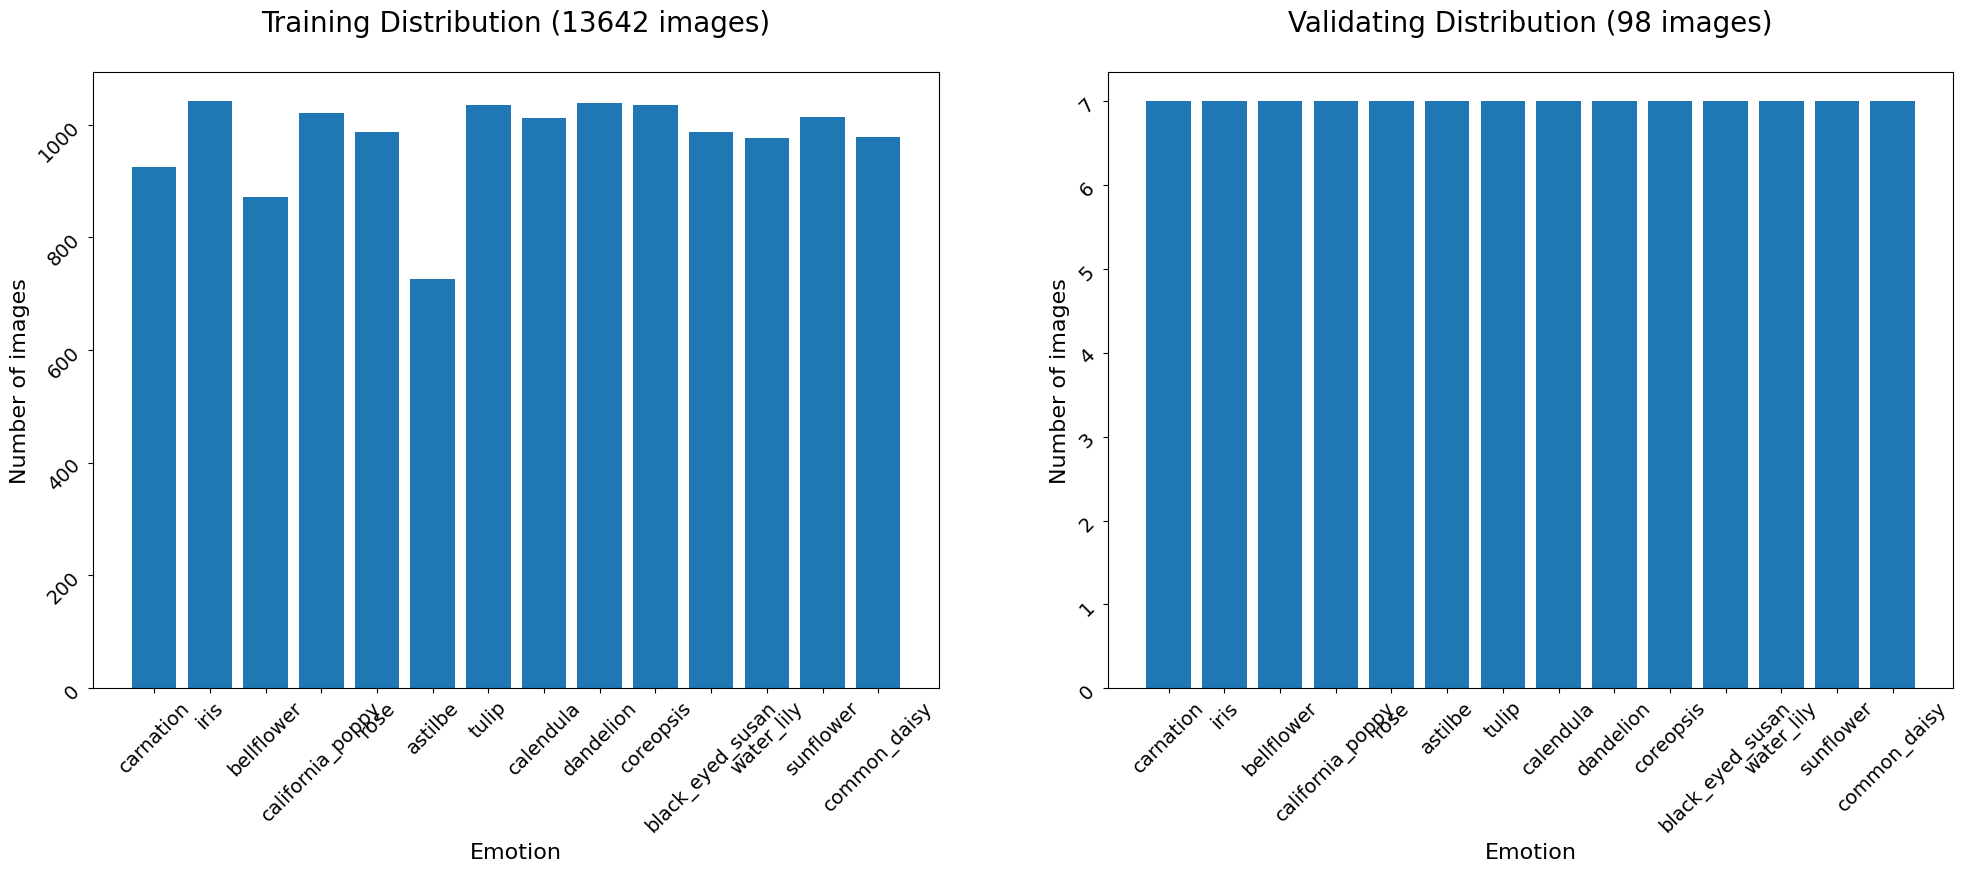

In [12]:
view_hist_data(x_train, y_train, x_test, y_test, save_path = f'{save_dir}/distribution.png')

Sample training images


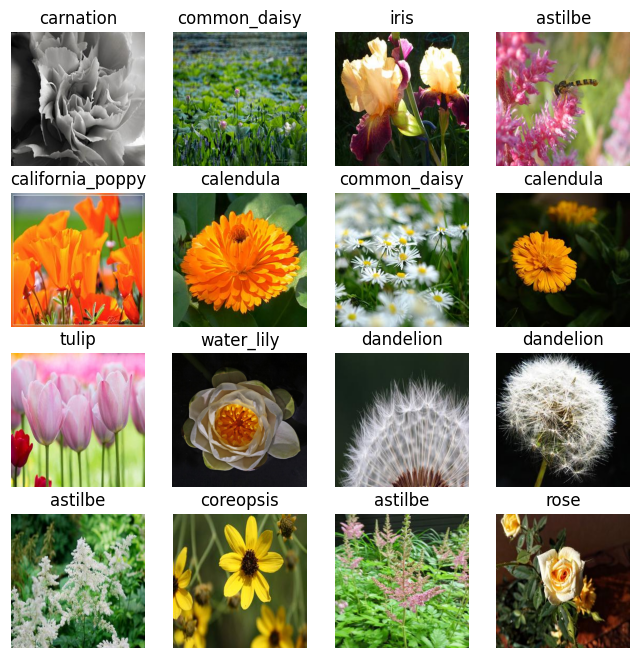

Sample Test images


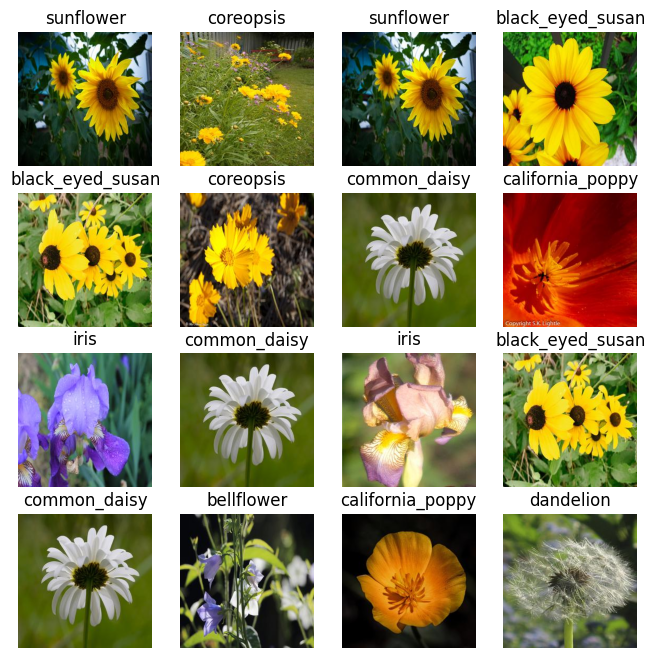

In [13]:
print("Sample training images")
view_images(x_train, y_train, None, rows = 4, cols = 4, figsize = (8, 8), 
            save_path = f'{save_dir}/sample_training_images.png')

print("Sample Test images")
view_images(x_test, y_test, None, rows = 4, cols = 4, figsize = (8, 8), 
            save_path = f'{save_dir}/sample_validating_images.png')



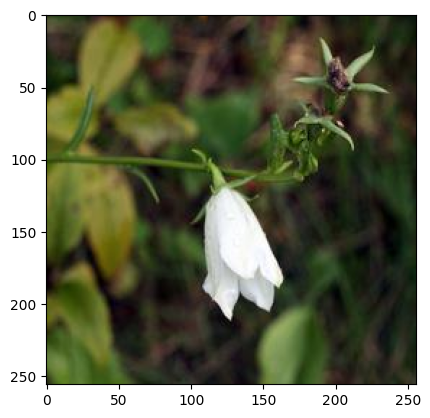

In [14]:
flow1 = cv2.imread(f'{data_dir}/train/bellflower/48917780_834f0a1ce3_c.jpg')
flow1 = cv2.cvtColor(flow1,cv2.COLOR_BGR2RGB)
plt.imshow(flow1)

In [15]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1,
                               height_shift_range=0.1, 
                               rescale=1./255., 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True, 
                               fill_mode='nearest', 
                               validation_split=0.2
                              )

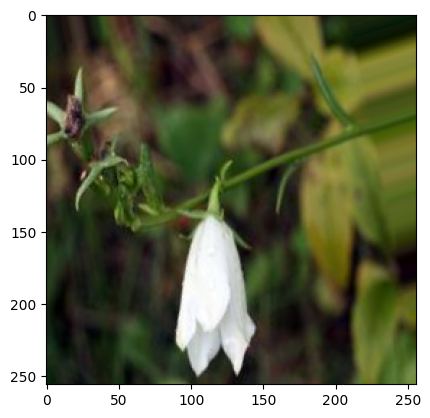

In [16]:
plt.imshow(image_gen.random_transform(flow1))

In [17]:
batch_size = 64
target_size = (224,224)
train_image_gen = image_gen.flow_from_directory(f'{data_dir}/train',
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')

Found 10919 images belonging to 14 classes.


In [18]:
valid_image_gen = image_gen.flow_from_directory(f'{data_dir}/train',
                                               target_size=target_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='validation')

Found 2723 images belonging to 14 classes.


In [19]:
train_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11,
 'tulip': 12,
 'water_lily': 13}

In [20]:
# current_class_indices = train_image_gen.class_indices

# desired_order = ["carnation", "iris", "bellflower", "california_poppy", "rose", "astilbe", 
#                  "tulip", "calendula", "dandelion", "coreopsis", "black_eyed_susan", 
#                  "water_lily", "sunflower", "common_daisy"]

# sorted_class_indices = {}
# for idx, label in enumerate(desired_order):
#     if label in current_class_indices:
#         sorted_class_indices[label] = idx

# train_image_gen.class_indices = sorted_class_indices
# valid_image_gen.class_indices = sorted_class_indices
# print(train_image_gen.class_indices)
# print(valid_image_gen.class_indices)


In [21]:
train_image_gen.classes

array([ 0,  0,  0, ..., 13, 13, 13])

In [22]:
# # Get a batch from the DirectoryIterator
# batch_images, batch_labels = next(train_image_gen)
# valid_images,valid_labels=next(valid_image_gen)

# # Check the shape of the batch
# print("Batch images shape:", batch_images.shape)
# print("Batch labels shape:", batch_labels.shape)

In [23]:
# Assuming you have your input data ready
train_steps = 100000//batch_size
valid_steps = 20000//batch_size

# input_data_resnet = batch_images  # shape: (num_samples, 224, 224, 3)
# input_data_vgg = batch_images     # shape: (num_samples, 224, 224, 3)
# target_data = batch_labels 


# valid_data_resnet=valid_images
# valid_data_vgg=valid_images
# valid_target_data =valid_labels# 

In [24]:
# print(batch_labels)

In [25]:
unique_classes = np.array(np.unique(train_image_gen.classes))
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=train_image_gen.classes)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 1.342389968035407,
 1: 1.1173761768317643,
 2: 0.9885026253847546,
 3: 0.9640649832244393,
 4: 0.954624934429096,
 5: 1.053957528957529,
 6: 0.9960773581463237,
 7: 0.9419427191166322,
 8: 0.9385422038851642,
 9: 0.9362888012347796,
 10: 0.9885026253847546,
 11: 0.9616875110093359,
 12: 0.9419427191166322,
 13: 0.997351114358787}

In [26]:
# !wget https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_vgg16.h5
# !wget https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_resnet50.h5
# !wget https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_tf_notop_senet50.h5    


In [27]:
# !mkdir E:\\AIDU\\flower_classification\\models\\weights

In [28]:
# !move rcmalli_vggface_tf_notop_vgg16.h5 E:\\AIDU\\flower_classification\\models\\weights
# !move rcmalli_vggface_tf_notop_resnet50.h5 E:\\AIDU\\flower_classification\\models\\weights
# !move rcmalli_vggface_tf_notop_senet50.h5 E:\\AIDU\\flower_classification\\models\\weights

In [29]:
from models.models import VGG16, RESNET50
from tensorflow.keras import backend as K
# K.set_image_data_format('channels_last')
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import plot_model



In [30]:
vgg16_model = VGG16(include_top=False,input_shape=(224,224,3),pooling='avg')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
vgg16_model.load_weights("D:/AIDU/flower_classification/models/weights/rcmalli_vggface_tf_notop_vgg16.h5")
x = vgg16_model.layers[-1].output
prediction_vgg16=Dense(14, activation='softmax',name='output2')(x)
vgg16_model = Model(inputs=vgg16_model.input, outputs=prediction_vgg16,name='vgg16')
lr=0.0001
vgg16_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

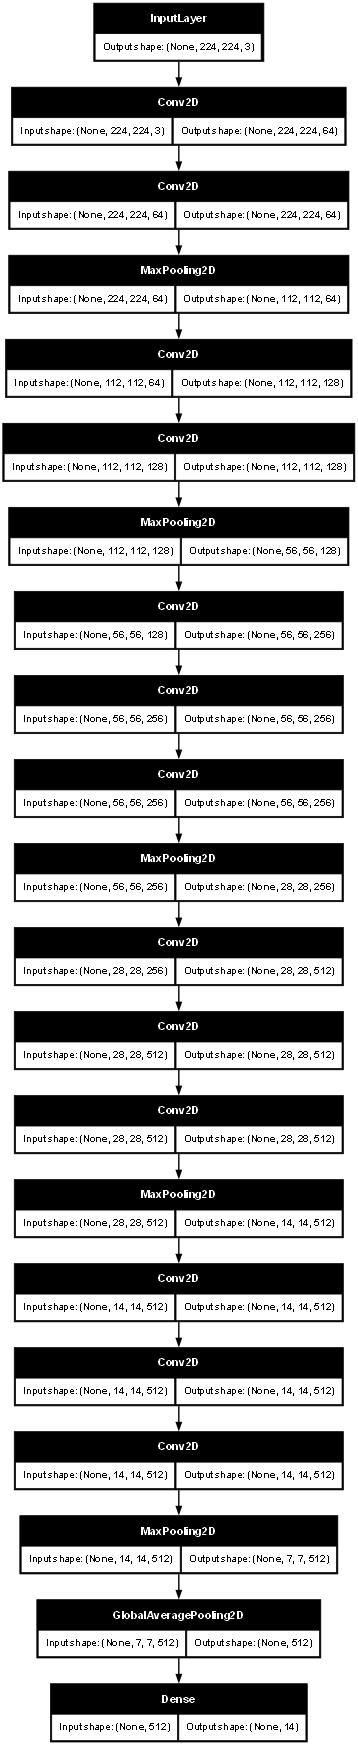

In [32]:
plot_model(vgg16_model, to_file="vgg16.png", show_shapes=True, dpi=50, expand_nested=True)


In [33]:
early_stopping = EarlyStopping(monitor='val_loss',
    # min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.95,
    patience=2,
    min_lr=0.000001,
    verbose=1,
)

os.makedirs('weights', exist_ok=True)

checkpoint_filepath = '/weights/checkpoint.weights.h5'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [34]:
starting_time = time.time()


In [35]:
history = vgg16_model.fit(
    train_image_gen,
    epochs=30,
    batch_size=64,
    validation_data=valid_image_gen,
    validation_steps=valid_steps,
    callbacks=[early_stopping,lr_scheduler, checkpoint],
    class_weight=class_weights_dict
)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Epoch 1/30


e:\User\miniconda3\envs\image_ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2971 - loss: 2.1266 

e:\User\miniconda3\envs\image_ai\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


171/171 ━━━━━━━━━━━━━━━━━━━━ 2255s 13s/step - accuracy: 0.2979 - loss: 2.1242 - val_accuracy: 0.6071 - val_loss: 1.1832 - learning_rate: 1.0000e-04
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2250s 13s/step - accuracy: 0.6659 - loss: 1.0306 - val_accuracy: 0.6831 - val_loss: 0.9768 - learning_rate: 1.0000e-04
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2272s 13s/step - accuracy: 0.7424 - loss: 0.8083 - val_accuracy: 0.7598 - val_loss: 0.7770 - learning_rate: 1.0000e-04
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2283s 13s/step - accuracy: 0.7825 - loss: 0.6780 - val_accuracy: 0.7620 - val_loss: 0.7263 - learning_rate: 1.0000e-04
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2289s 13s/step - accuracy: 0.8051 - loss: 0.6100 - val_accuracy: 0.7899 - val_loss: 0.6491 - learning_rate: 1.0000e-04
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2293s 13s/step - accuracy: 0.8495 - loss: 0.4931 - val_accuracy: 0.7995 - val_loss: 0.6121 - learning_rate: 1.0000e-04
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 2332s 14s/step - 

In [36]:
vgg16_model.save('weights/model.h5')


In [37]:
acc = vgg16_model.history.history['accuracy']
val_acc = vgg16_model.history.history['val_accuracy']
loss = vgg16_model.history.history['loss']
val_loss = vgg16_model.history.history['val_loss']

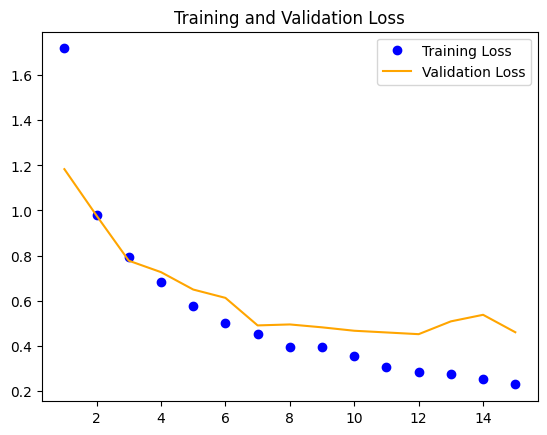

In [38]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)

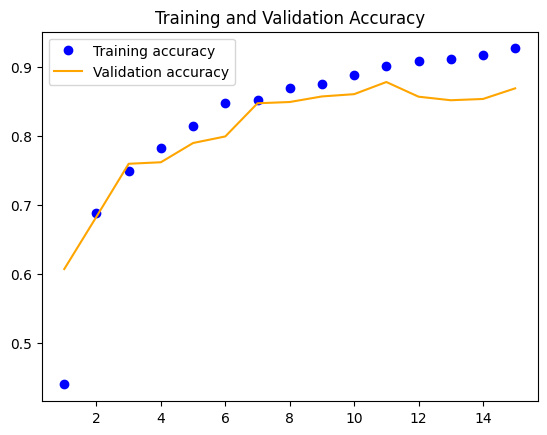

In [39]:
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

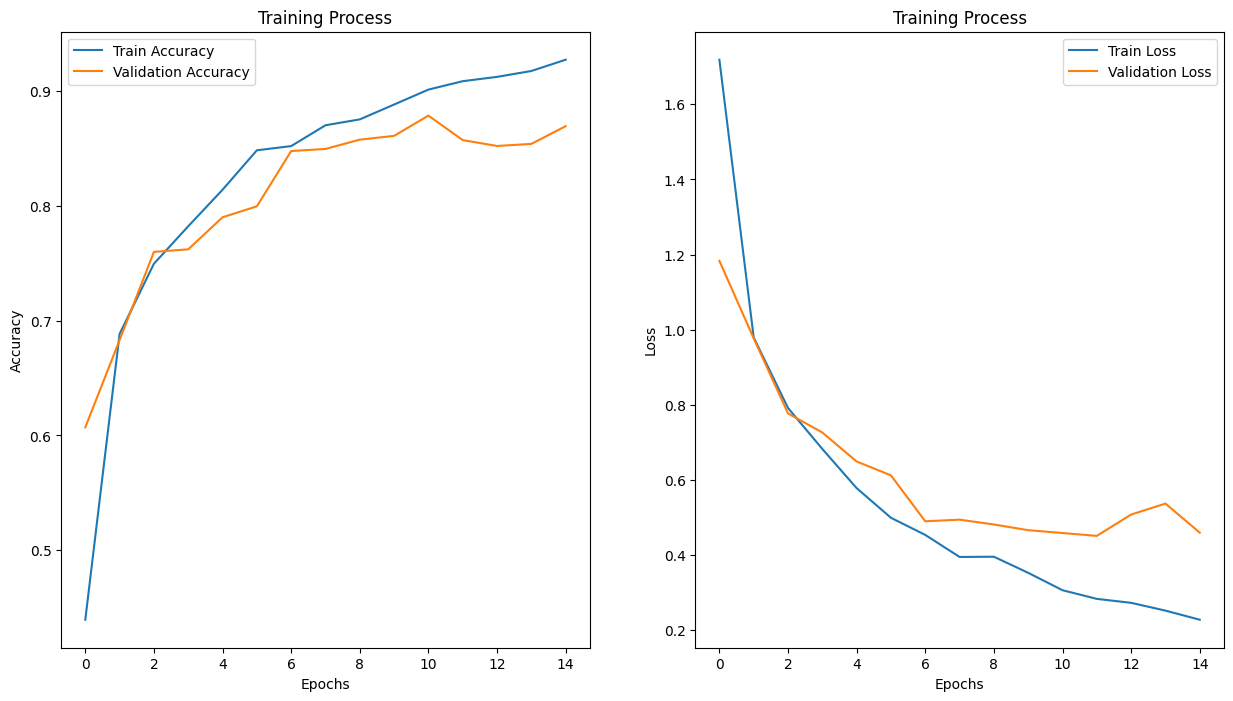

<Figure size 640x480 with 0 Axes>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Lấy dữ liệu từ history
history = vgg16_model.history.history

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Biểu đồ accuracy của tập kiểm tra và tập validation
axes[0].plot(pd.DataFrame(history['accuracy']), label='Train Accuracy')
axes[0].plot(pd.DataFrame(history['val_accuracy']), label='Validation Accuracy')
axes[0].set_title('Training Process')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Biểu đồ loss của tập kiểm tra và tập validation
axes[1].plot(pd.DataFrame(history['loss']), label='Train Loss')
axes[1].plot(pd.DataFrame(history['val_loss']), label='Validation Loss')
axes[1].set_title('Training Process')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Hiển thị biểu đồ
plt.show()

# Lưu biểu đồ vào file
plt.savefig('train.png')

In [74]:
image_test_data=f'{data_dir}/val'
test_datagen = ImageDataGenerator(rescale=1./255.)

test_image_gen = test_datagen.flow_from_directory(
    image_test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Không xáo trộn để giữ nguyên thứ tự khi đánh giá và dự đoán
)

Found 98 images belonging to 14 classes.


In [75]:
test_image_gen.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'dandelion': 8,
 'iris': 9,
 'rose': 10,
 'sunflower': 11,
 'tulip': 12,
 'water_lily': 13}

In [72]:
# from tensorflow.keras.utils import to_categorical
# y_test_labels = []
# for images, labels in y_test:
#     y_test_labels.extend(labels.numpy())
# y_true = np.array(y_test_labels)
# num_classes = len(np.unique(y_test_labels))  # Số lượng lớp
# y_test_one_hot = to_categorical(y_test_labels, num_classes=num_classes)


In [76]:
loss, acc = vgg16_model.evaluate(test_image_gen)
print('Test Loss:', loss)
print('Test Accuracy:', acc)


e:\User\miniconda3\envs\image_ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 999ms/step - accuracy: 0.8718 - loss: 0.4034
Test Loss: 0.3494936525821686
Test Accuracy: 0.8877550959587097


In [96]:
probability = vgg16_model.predict(test_image_gen)
y_pred = np.argmax(probability, axis=1)
y_test_labels = test_image_gen.classes



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 985ms/step


In [97]:
print(y_test_labels.shape, y_pred.shape)


(98,) (98,)


In [110]:
from utils.utils import plot_confusion_matrix

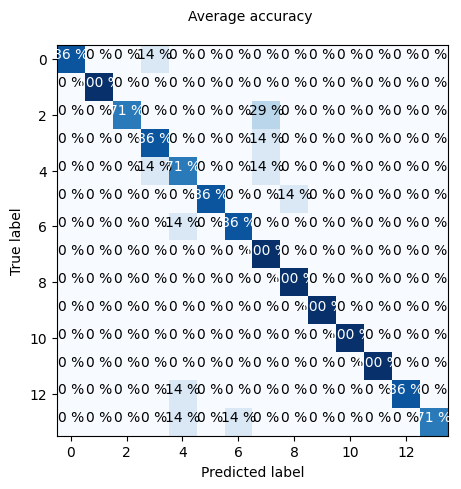

In [112]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,tick_size=10,title_size=10,axis_label_size=10)

In [113]:
def plot_confusion_matrix(y_test, y_pred, classes=None,
                          normalize=True,
                          title='Average accuracy \n',
                          cmap=plt.cm.Blues,
                          verbose=0, precision=0,
                          text_size=10,
                          title_size=25,
                          axis_label_size=16,
                          tick_size=14, save_path=None, 
                          has_colorbar = False,
                          ):
    """
    https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import confusion_matrix
    import itertools

    cm = confusion_matrix(y_test_labels, y_pred)
    acc = sum(cm.diagonal() / cm.sum()) * 100.0

    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100.0
        if verbose == 1: 
            print("Normalized confusion matrix")
    else:
        if verbose == 1: 
            print('Confusion matrix, without normalization')

    if verbose == 1: 
        print(cm)

    # Vẽ hình
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title.format_map({'acc': acc}), fontsize=title_size)
    if has_colorbar:
        plt.colorbar()

    if classes is not None:
        ax = plt.gca()
        ax.set_xticklabels([''] + classes, fontsize=tick_size, rotation=45)
        ax.set_yticklabels([''] + classes, fontsize=tick_size)

    fmt = '{:.' + '%d' % (precision) + 'f} %' if normalize else '{:d} %'
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black", fontsize=text_size)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=axis_label_size)
    plt.xlabel('Predicted label', fontsize=axis_label_size)

    # Lưu hình nếu cần thiết
    if save_path is not None:
        dirname = os.path.dirname(save_path)
        if dirname != "" and not os.path.exists(dirname):
            os.makedirs(dirname)
        plt.savefig(save_path)

    plt.show()  # Hiển thị hình ảnh

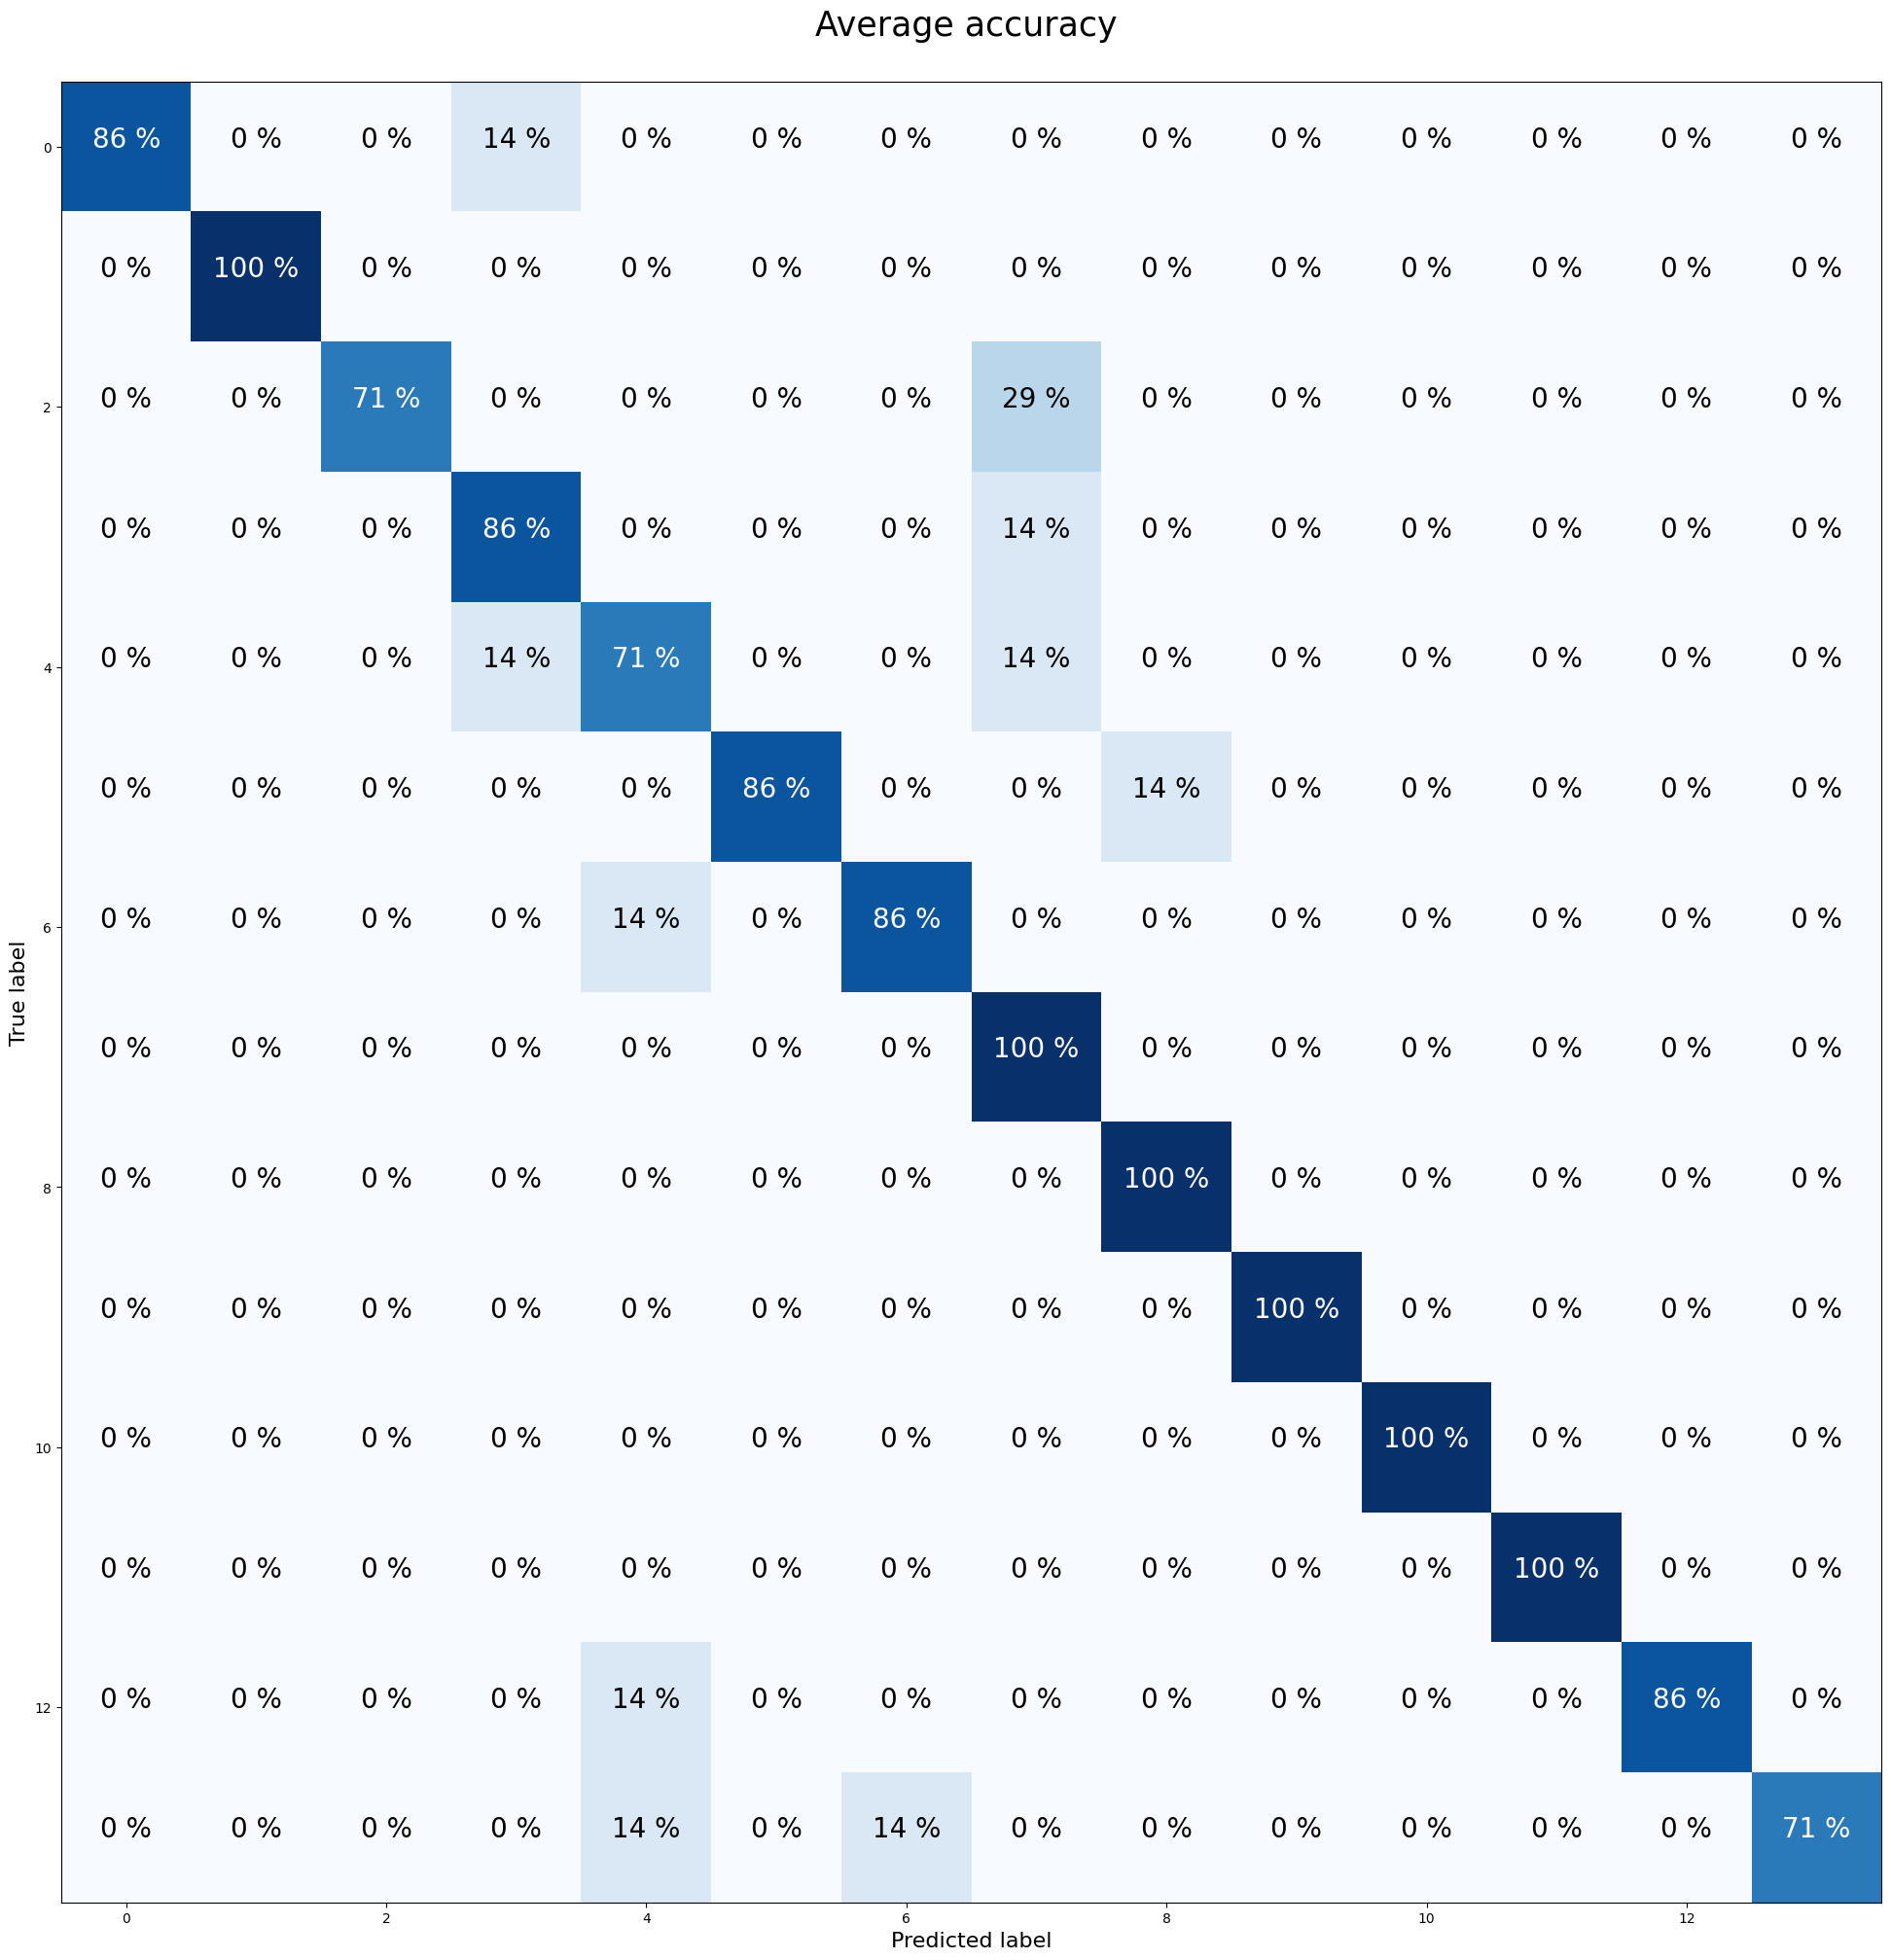

In [118]:
plot_confusion_matrix(y_test=y_test_labels,y_pred=y_pred,text_size=20,tick_size=30)